# Preprocessing

In [16]:
import os
import shutil

import numpy as np
import pandas as pd

from tqdm import tqdm

In [17]:
# If true, load df from saved pickle files instead of generating again
restore_df = True

In [18]:
images_path = '/Users/raymondzhou/CelebA/Img/img_align_celeba'
labels_path = '/Users/raymondzhou/CelebA/Anno/list_attr_celeba.csv'

In [19]:
labels_df = pd.read_csv(labels_path, index_col=0)
labels_df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [20]:
eval_path = '/Users/raymondzhou/CelebA/Eval/list_eval_partition.csv'
train_path = '/Users/raymondzhou/CelebA/Img/train'
val_path = '/Users/raymondzhou/CelebA/Img/val'
test_path = '/Users/raymondzhou/CelebA/Img/test'

In [21]:
image_files = os.listdir(images_path)
len(image_files)

202599

In [22]:
eval_df = pd.read_csv(eval_path, index_col=0)
eval_df.head()

,type
000001.jpg,0
000002.jpg,0
000003.jpg,0
000004.jpg,0
000005.jpg,0


In [24]:
# this takes ~40 mins
if not restore_df:
    train_dict = {}
    val_dict = {}
    test_dict = {}

    for image_file in tqdm(image_files, mininterval=30):
        labels = np.array(labels_df[labels_df.index==image_file])
        image_type = eval_df[eval_df.index==image_file].iloc[0]['type']

        if image_type == 0:
            train_dict[image_file] = labels
            shutil.copy(f'{images_path}/{image_file}', f'{train_path}/{image_file}')
        elif image_type == 1:
            val_dict[image_file] = labels
            shutil.copy(f'{images_path}/{image_file}', f'{val_path}/{image_file}')
        elif image_type == 2:
            test_dict[image_file] = labels
            shutil.copy(f'{images_path}/{image_file}', f'{test_path}/{image_file}')

In [25]:
if restore_df:
    train_df = pd.read_pickle('train.pickle')
else:    
    train_df = pd.DataFrame(train_dict.items(), index=train_dict.keys())
    train_df.drop(train_df.columns[0], axis=1, inplace=True)
    train_df.index = train_dict.keys()
    train_df.columns = ['labels']

    train_df.sort_index(inplace=True)
    train_df.to_pickle('train.pickle')

train_df.head()

,labels
000001.jpg,"[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
000002.jpg,"[[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,..."
000003.jpg,"[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,..."
000004.jpg,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
000005.jpg,"[[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [37]:
if restore_df:
    val_df = pd.read_pickle('val.pickle')
else:
    val_df = pd.DataFrame(val_dict.items(), index=val_dict.keys())
    val_df.drop(val_df.columns[0], axis=1, inplace=True)
    val_df.index = val_dict.keys()
    val_df.columns = ['labels']

    val_df.sort_index(inplace=True)
    val_df.to_pickle('val.pickle')

val_df.head()

,labels
162771.jpg,"[[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."
162772.jpg,"[[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,..."
162773.jpg,"[[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,..."
162774.jpg,"[[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
162775.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."


In [38]:
if restore_df:
    test_df = pd.read_pickle('test.pickle')
else:
    test_df = pd.DataFrame(test_dict.items(), index=test_dict.keys())
    test_df.drop(test_df.columns[0], axis=1, inplace=True)
    test_df.index = test_dict.keys()
    test_df.columns = ['labels']

    test_df.sort_index(inplace=True)
    test_df.to_pickle('test.pickle')

test_df.head()

,labels
182638.jpg,"[[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
182639.jpg,"[[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,..."
182640.jpg,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
182641.jpg,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
182642.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."


# Training

In [39]:
import copy
import time

import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms

from CelebADataset import MultiClassCelebA

In [40]:
# Number of classes in the dataset
num_classes = 40

# Batch size for training
batch_size = 8

# Number of epochs to train for
num_epochs = 25

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Flag for feature extracting. When True, only update reshaped layer params 
# When False, finetune the whole model, 
feature_extract = True

In [41]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

def initialize_model(num_classes, feature_extract, use_pretrained=True):
    model_ft = torchvision.models.squeezenet1_1(pretrained=use_pretrained)
    set_parameter_requires_grad(model_ft, feature_extract)
    model_ft.classifier[1] = torch.nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
    model_ft.num_classes = num_classes
    input_size = 224

    return model_ft, input_size


# Initialize the model for this run
model_ft, input_size = initialize_model(num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): MaxPool2d

In [42]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


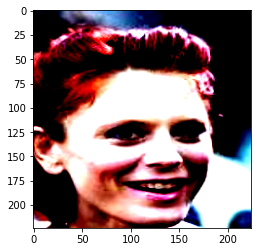

In [43]:
train_dl = MultiClassCelebA(train_df, train_path, transform=data_transforms['train'])
plt.imshow((train_dl[1]['image']).permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


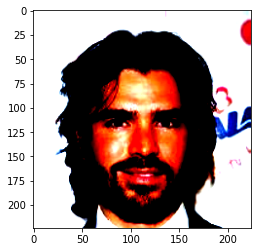

In [44]:
val_dl = MultiClassCelebA(val_df, val_path, transform=data_transforms['val'])
plt.imshow((val_dl[1]['image']).permute(1, 2, 0))

In [45]:
dataloaders = {
    'train': torch.utils.data.DataLoader(train_dl, shuffle=True, batch_size=batch_size, num_workers=4),
    'val': torch.utils.data.DataLoader(val_dl, shuffle=True, batch_size=batch_size, num_workers=4)
}

In [47]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=5):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                inputs = (data['image']).to(device)
                labels = (data['label'].float()).to(device)
                
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 0)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} loss: {:.4f} acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [48]:
model_ft = model_ft.to(device)

params_to_update = model_ft.parameters()
if feature_extract:
    params_to_update = []
    for name, param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print(name)
else:
    for name, param in model_ft.named_parameters():
        if param.requires_grad == True:
            print(name)

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9)

features.0.weight
features.0.bias
features.3.squeeze.weight
features.3.squeeze.bias
features.3.expand1x1.weight
features.3.expand1x1.bias
features.3.expand3x3.weight
features.3.expand3x3.bias
features.4.squeeze.weight
features.4.squeeze.bias
features.4.expand1x1.weight
features.4.expand1x1.bias
features.4.expand3x3.weight
features.4.expand3x3.bias
features.6.squeeze.weight
features.6.squeeze.bias
features.6.expand1x1.weight
features.6.expand1x1.bias
features.6.expand3x3.weight
features.6.expand3x3.bias
features.7.squeeze.weight
features.7.squeeze.bias
features.7.expand1x1.weight
features.7.expand1x1.bias
features.7.expand3x3.weight
features.7.expand3x3.bias
features.9.squeeze.weight
features.9.squeeze.bias
features.9.expand1x1.weight
features.9.expand1x1.bias
features.9.expand3x3.weight
features.9.expand3x3.bias
features.10.squeeze.weight
features.10.squeeze.bias
features.10.expand1x1.weight
features.10.expand1x1.bias
features.10.expand3x3.weight
features.10.expand3x3.bias
features.11.

In [ ]:
# Setup the loss fxn
criterion = torch.nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders, criterion, optimizer_ft, num_epochs=num_epochs)
torch.save(model_ft, "squeezenet_fine_tune_bsize8_epoch40.pt")